In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [61]:
%matplotlib inline

### Assemble data ###

In [62]:
#assign url variable where we will pull data from
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data"
#pull down the csv info into a pandas dataframe
ad_df = pd.read_csv(url, header=None, dtype=None)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
#ad_df.shape

In [64]:
#Get column names
#assign url variable where we will pull data from for column names
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.names"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml").text.split('\n')

In [65]:
ad_names = pd.DataFrame({'attributes':soup})
print (ad_names)

                                             attributes
0     | "w:\c4.5\alladA" names file -- automatically...
1                                                      
2                                  ad, nonad | classes.
3                                                      
4                                   height: continuous.
5                                    width: continuous.
6                                   aratio: continuous.
7                                           local: 0,1.
8                         | 457 features from url terms
9                              url*images+buttons: 0,1.
10                             url*likesbooks.com: 0,1.
11                              url*www.slake.com: 0,1.
12                             url*hydrogeologist: 0,1.
13                                        url*oso: 0,1.
14                                      url*media: 0,1.
15                               url*peace+images: 0,1.
16                                  url*blipvert

### Data Prep

In [66]:
#clean up the values in the column
def clean_attr(row):
    return str(row.replace("*","_").replace(".","").replace("0","").replace("1","").replace(",","").replace(":","").strip())
ad_names['attributes'] = ad_names['attributes'].apply(clean_attr)

In [67]:
ad_names.set_value(1567,'attributes','ad nonad')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,attributes
0,"| ""w\c45\alladA"" names file -- automatically g..."
1,
2,ad nonad | classes
3,
4,height continuous
5,width continuous
6,aratio continuous
7,local
8,| 457 features from url terms
9,url_images+buttons


In [68]:
ad_names = ad_names.drop(ad_names.index[[0,1,2,3,8,466,962,1435,1547]])

In [69]:
#Add column names to ad dataframe
#create a column name list
ad_columns = ad_names["attributes"].tolist()
ad_df.columns = ad_columns #add column to dataframe

In [70]:
#remove . from "ad nonad" column
ad_df["ad nonad"] = ad_df["ad nonad"].map(lambda x: str(x)[:-1])

In [71]:
#check data types
ad_df.dtypes

height continuous            object
width continuous             object
aratio continuous            object
local                        object
url_images+buttons            int64
url_likesbookscom             int64
url_wwwslakecom               int64
url_hydrogeologist            int64
url_oso                       int64
url_media                     int64
url_peace+images              int64
url_blipverts                 int64
url_tkaine+kats               int64
url_labyrinth                 int64
url_advertising+blipverts     int64
url_images+oso                int64
url_area5+corridor            int64
url_ran+gifs                  int64
url_express-scriptscom        int64
url_off                       int64
url_cnet                      int64
url_time+998                  int64
url_josefina3                 int64
url_truluckcom                int64
url_clawnext+gif              int64
url_autopencom                int64
url_tvgencom                  int64
url_pixs                    

In [72]:
#count data types
ad_df.dtypes.value_counts()

int64     1554
object       5
dtype: int64

In [73]:
#check why "local" is an object data type as it is supposed to be binary and does not contain any "?" in the expanded view above
print(ad_df.loc[:,"local"].unique()) 

['1' '0' '?' 1 0]


In [74]:
# Coerce to numeric and impute medians for height continuous column
ad_df.loc[:, "height continuous"] = pd.to_numeric(ad_df.loc[:, "height continuous"], errors='coerce')
HasNan = np.isnan(ad_df.loc[:,"height continuous"])
ad_df.loc[HasNan, "height continuous"] = np.nanmedian(ad_df.loc[:,"height continuous"])

(array([2.496e+03, 5.100e+02, 2.020e+02, 4.700e+01, 1.100e+01, 9.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  64.9, 128.8, 192.7, 256.6, 320.5, 384.4, 448.3, 512.2,
        576.1, 640. ]),
 <a list of 10 Patch objects>)

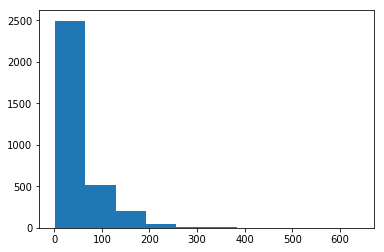

In [75]:
plt.hist(ad_df.loc[:, "height continuous"])

In [76]:
## The high limit for acceptable values is the mean plus 2 standard deviations
LimitHi = ad_df.loc[:, "height continuous"].mean() + 2*(ad_df.loc[:, "height continuous"].std())
print(LimitHi)

154.56514120646216


In [77]:
#Replace outliers
TooHigh = ad_df.loc[:, "height continuous"] > LimitHi
ad_df.loc[TooHigh, "height continuous"] = LimitHi

(array([ 369.,  424.,  324., 1359.,  137.,  140.,  130.,   84.,   84.,
         228.]), array([  1.        ,  16.35651412,  31.71302824,  47.06954236,
         62.42605648,  77.7825706 ,  93.13908472, 108.49559884,
        123.85211297, 139.20862709, 154.56514121]), <a list of 10 Patch objects>)

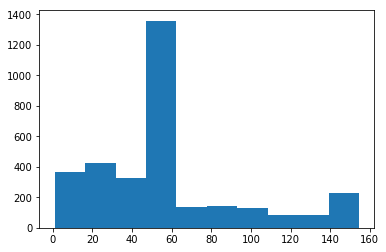

In [78]:
plt.hist(ad_df.loc[:, "height continuous"])

In [79]:
# Coerce to numeric and impute medians for width continuous column
ad_df.loc[:, "width continuous"] = pd.to_numeric(ad_df.loc[:, "width continuous"], errors='coerce')
HasNan = np.isnan(ad_df.loc[:,"width continuous"])
ad_df.loc[HasNan, "width continuous"] = np.nanmedian(ad_df.loc[:,"width continuous"])

(array([4.640e+02, 1.849e+03, 3.890e+02, 2.540e+02, 3.500e+01, 1.800e+01,
        3.900e+01, 2.040e+02, 1.000e+00, 2.600e+01]),
 array([  1. ,  64.9, 128.8, 192.7, 256.6, 320.5, 384.4, 448.3, 512.2,
        576.1, 640. ]),
 <a list of 10 Patch objects>)

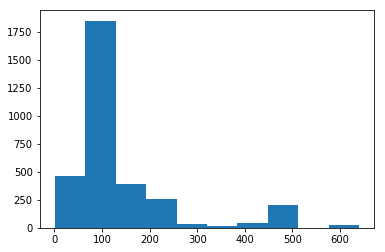

In [80]:
plt.hist(ad_df.loc[:, "width continuous"])

In [81]:
# Coerce to numeric and impute medians for aratio continuous column
ad_df.loc[:, "aratio continuous"] = pd.to_numeric(ad_df.loc[:, "aratio continuous"], errors='coerce')
HasNan = np.isnan(ad_df.loc[:,"aratio continuous"])
ad_df.loc[HasNan, "aratio continuous"] = np.nanmedian(ad_df.loc[:,"aratio continuous"])

(array([2.765e+03, 4.810e+02, 4.000e+00, 5.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+01]),
 array([1.500000e-03, 6.001350e+00, 1.200120e+01, 1.800105e+01,
        2.400090e+01, 3.000075e+01, 3.600060e+01, 4.200045e+01,
        4.800030e+01, 5.400015e+01, 6.000000e+01]),
 <a list of 10 Patch objects>)

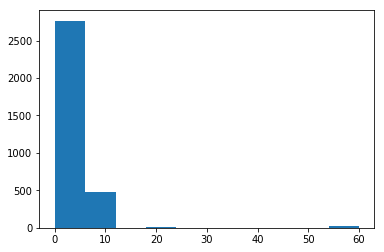

In [82]:
plt.hist(ad_df.loc[:, "aratio continuous"])

In [83]:
## The high limit for acceptable values is the mean plus 2 standard deviations
LimitHi = ad_df.loc[:, "aratio continuous"].mean() + 2*(ad_df.loc[:, "aratio continuous"].std())
print(LimitHi)

13.809091493987335


In [84]:
#Replace outliers
TooHigh = ad_df.loc[:, "aratio continuous"] > LimitHi
ad_df.loc[TooHigh, "aratio continuous"] = LimitHi

(array([9.08e+02, 1.32e+03, 2.87e+02, 2.13e+02, 8.70e+01, 2.84e+02,
        1.21e+02, 2.50e+01, 1.00e+00, 3.30e+01]),
 array([1.50000000e-03, 1.38225915e+00, 2.76301830e+00, 4.14377745e+00,
        5.52453660e+00, 6.90529575e+00, 8.28605490e+00, 9.66681405e+00,
        1.10475732e+01, 1.24283323e+01, 1.38090915e+01]),
 <a list of 10 Patch objects>)

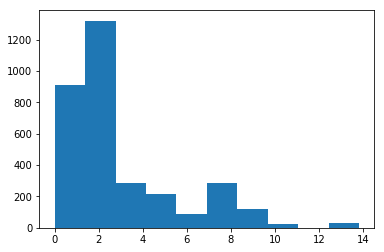

In [85]:
plt.hist(ad_df.loc[:, "aratio continuous"])

In [86]:
# Coerce to numeric and impute medians for local column
ad_df.loc[:, "local"] = pd.to_numeric(ad_df.loc[:, "local"], errors='coerce')
HasNan = np.isnan(ad_df.loc[:,"local"])
ad_df.loc[HasNan, "local"] = np.nanmedian(ad_df.loc[:,"local"])

In [87]:
#check data type counts
ad_df.dtypes.value_counts()

int64      1554
float64       4
object        1
dtype: int64

In [88]:
ad_df.head()

,height continuous,width continuous,aratio continuous,local,url_images+buttons,url_likesbookscom,url_wwwslakecom,url_hydrogeologist,url_oso,url_media,...,caption_home,caption_my,caption_your,caption_in,caption_bytes,caption_here,caption_click,caption_for,caption_you,ad nonad
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad


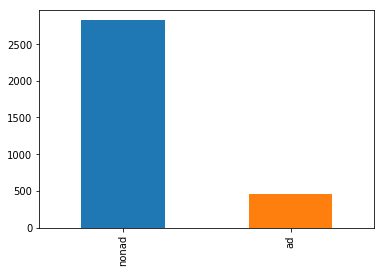

In [89]:
# plot the counts for each category
ad_df.loc[:,"ad nonad"].value_counts().plot(kind='bar')

In [90]:
#create new numeric colmns
ad_df.loc[:,"ad"] = (ad_df.loc[:,"ad nonad"] == "ad").astype(int)
ad_df.loc[:,"nonad"] = (ad_df.loc[:,"ad nonad"] == "nonad").astype(int)

In [91]:
# Remove obsolete column "ad nonad"
ad_df = ad_df.drop("ad nonad", axis=1)

### Normalization

In [92]:
#columns to apply z-normalization aka standardization
p = ad_df[['height continuous','width continuous','aratio continuous']]

In [93]:
#standardization - change the variable so that it’s mean is equal to 0.0 and its standard dev is equal to 1.0
standardization_scale = StandardScaler().fit(p)

In [94]:
z = standardization_scale.transform(p)

In [95]:
hc_scaled = pd.DataFrame(z)

In [96]:
ad_df[['height continuous','width continuous','aratio continuous']] = hc_scaled

In [97]:
#Drop 'nonad' column. 'ad' will be the target
ad_df = ad_df.drop("nonad", axis=1)

In [98]:
ad_df.head()

,height continuous,width continuous,aratio continuous,local,url_images+buttons,url_likesbookscom,url_wwwslakecom,url_hydrogeologist,url_oso,url_media,...,caption_home,caption_my,caption_your,caption_in,caption_bytes,caption_here,caption_click,caption_for,caption_you,ad
0,1.817265,-0.158911,-0.804119,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.025925,2.888693,1.967350,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.676463,0.774029,1.490390,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.055392,2.888693,1.809568,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.055392,2.888693,1.809568,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Export data

In [99]:
#dataframe to csv
ad_df.to_csv('InternetAd_Dataset.csv', index=None)

### Data Modeling

### Split dataset - training/test

In [100]:
def split_dataset(data, r): # split a dataset
	N = len(data)
	X = []
	Y = []
	
	if r >= 1: 
		print ("Parameter r needs to be smaller than 1!")
		return
	elif r <= 0:
		print ("Parameter r needs to be larger than 0!")
		return

	n = int(round(N*r)) # number of elements in testing sample
	nt = N - n # number of elements in training sample
	ind = -np.ones(n,int) # indexes for testing sample
	R = np.random.randint(N) # some random index from the whole dataset
	
	for i in range(n):
		while R in ind: R = np.random.randint(N) # ensure that the random index hasn't been used before
		ind[i] = R

	ind_ = list(set(range(N)).difference(ind)) # remaining indexes	
	X = data[ind_,:-1] # training features
	XX = data[ind,:-1] # testing features
	Y = data[ind_,-1] # training targets
	YY = data[ind,-1] # testing targests
	return X, XX, Y, YY

In [101]:
r = 0.2 # ratio of test data over all data (this can be changed to any number between 0.0 and 1.0 (not inclusive)
dataset = np.genfromtxt('InternetAd_Dataset.csv', delimiter=",", skip_header=1)
X, XX, Y, YY = split_dataset(dataset, r)

### Train model

In [102]:
""" CLASSIFICATION MODELS """
# Logistic regression classifier
C_parameter = 50. / len(X) # parameter for regularization of the model
class_parameter = 'ovr' # parameter for dealing with multiple classes
penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
solver_parameter = 'saga' # optimization system used
tolerance_parameter = 0.1 # termination parameter

In [103]:
#Training the Model
clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X, Y) 
print ('coefficients:')
print (clf.coef_) # each row of this matrix corresponds to each one of the classes of the dataset
print ('intercept:')
print (clf.intercept_) # each element of this vector corresponds to each one of the classes of the dataset

# Apply the Model
print ('predictions for test set:')
print (clf.predict(XX))
print ('actual class values:')
print (YY)

coefficients:
[[0.00814579 0.87244303 0.0077207  ... 0.         0.         0.        ]]
intercept:
[-2.38842587]
predictions for test set:
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### Assess model

In [104]:
Y = (clf.predict(XX))
T = (YY)

In [105]:
# Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[544   8]
 [ 55  49]]

TP, TN, FP, FN: 49 , 544 , 8 , 55

Accuracy rate: 0.9039634146341463

Error rate: 0.09603658536585369

Precision: 0.86

Recall: 0.47

F1 score: 0.61


In [106]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'green' # Line Color

In [107]:
preds = clf.predict_proba(XX)[:,1]
fpr, tpr, th = roc_curve(T, preds) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.01 0.03 0.06 0.07 0.1  0.14 0.15 0.18 0.21 0.21 0.21 0.21 0.27 0.33
 0.45 0.47 0.47 0.49 0.49 0.5  0.55 0.55 0.56 0.56 0.57 0.57 0.58 0.58
 0.6  0.6  0.61 0.61 0.62 0.62 0.64 0.64 0.64 0.64 0.64 0.66 0.66 0.67
 0.67 0.68 0.68 0.69 0.69 0.7  0.7  0.72 0.72 0.73 0.73 0.74 0.74 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.77 0.77 0.8
 0.8  0.82 0.82 0.84 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85
 0.85 0.85 0.85 0.85 0.86 0.86 0.86 0.86 0.9  0.9  0.9  0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.95 0.95 0.95 0.95 0.95 0.95 0.97 0.97
 0.97 0.97 0.99 0.99 0.99 0.99 0.99 0.99 1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.  ]

FP rates: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.05 0.05 0.05 0.05 0.05
 0.06 0.06 

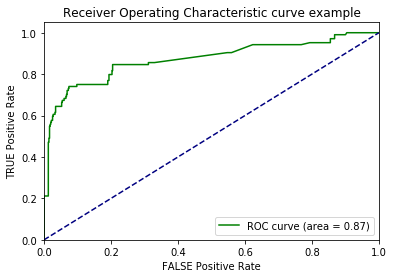

In [108]:
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [109]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, preds), 2), "\n")


AUC score (using auc function): 0.87

AUC score (using roc_auc_score function): 0.87 

